# NLP Basics: News Headlines Analysis

This notebook analyzes news headlines using basic text processing techniques.

## 1. Introduction & Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.linear_model import LinearRegression

# Set visualization style
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('news_headlines_dataset.csv')

# Display first 10 rows
print("First 10 headlines:")
print(df.head(10))

First 10 headlines:
   headline_id                                           headline  \
0            1  machine learning market expected to grow 15 pe...   
1            2  laptop update brings battery to millions of users   
2            3                Mayor Chen proposes climate changes   
3            4      AppWorks releases smartphone version 25 today   
4            5  Conservative coalition faces challenges on edu...   
5            6               Senate votes on economic reform bill   
6            7               The Office renewed for fourth season   
7            8      Australia faces criticism over economy policy   
8            9  smartwatch sales reach 3 million in first quarter   
9           10  Warriors secures playoff spot with win over Ra...   

        category  word_count  has_number  
0     Technology           8        True  
1     Technology           8       False  
2       Politics           5       False  
3     Technology           6        True  
4    

In [3]:
# Get basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

Dataset shape: (400, 5)

Column names: ['headline_id', 'headline', 'category', 'word_count', 'has_number']

Data types:
headline_id     int64
headline       object
category       object
word_count      int64
has_number       bool
dtype: object


## 2. Exploring the Data

In [4]:
# How many headlines are in each category?
category_counts = df['category'].value_counts()
print(category_counts)

category
Technology       100
Politics         100
Entertainment    100
Sports           100
Name: count, dtype: int64


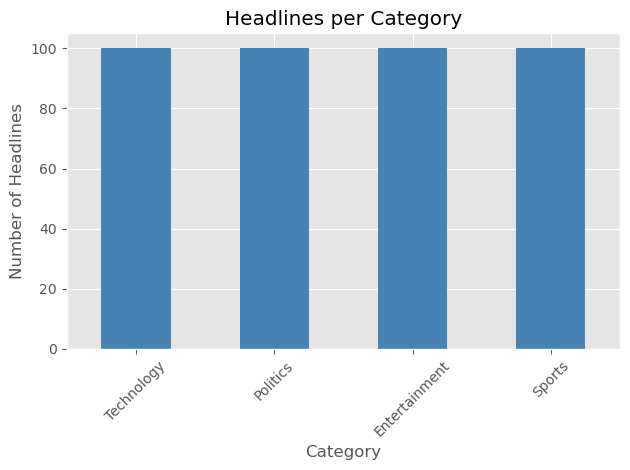

In [5]:
# Create a bar chart showing the number of headlines per category
df['category'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Headlines per Category')
plt.xlabel('Category')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# What is the average word count across all headlines?
avg_words = df['word_count'].mean()
print(f"Average word count: {avg_words:.2f} words")

Average word count: 7.14 words


## 3. Text Basics

In [7]:
# Get the first headline
example_headline = df['headline'].iloc[0]
print(f"Original headline: {example_headline}")
print(f"Type: {type(example_headline)}")

Original headline: machine learning market expected to grow 15 percent
Type: <class 'str'>


In [8]:
# Convert to lowercase
lowercase_headline = example_headline.lower()
print(f"Lowercase: {lowercase_headline}")

Lowercase: machine learning market expected to grow 15 percent


In [9]:
# Split into words (tokenization)
words = example_headline.split()
print(f"Words: {words}")
print(f"Number of words: {len(words)}")

Words: ['machine', 'learning', 'market', 'expected', 'to', 'grow', '15', 'percent']
Number of words: 8


## 4. Working with All Headlines

In [10]:
# Create a new column with all headlines in lowercase
df['headline_lower'] = df['headline'].str.lower()

# Display first 5 headlines
print(df[['headline', 'headline_lower']].head())

                                            headline  \
0  machine learning market expected to grow 15 pe...   
1  laptop update brings battery to millions of users   
2                Mayor Chen proposes climate changes   
3      AppWorks releases smartphone version 25 today   
4  Conservative coalition faces challenges on edu...   

                                      headline_lower  
0  machine learning market expected to grow 15 pe...  
1  laptop update brings battery to millions of users  
2                mayor chen proposes climate changes  
3      appworks releases smartphone version 25 today  
4  conservative coalition faces challenges on edu...  


In [11]:
# Count the total number of words across ALL headlines
total_words = df['word_count'].sum()
print(f"Total words across all headlines: {total_words}")

Total words across all headlines: 2855


In [12]:
# Find the longest and shortest headlines
longest_idx = df['word_count'].idxmax()
shortest_idx = df['word_count'].idxmin()

print("Longest headline:")
print(f"  {df.loc[longest_idx, 'headline']}")
print(f"  Words: {df.loc[longest_idx, 'word_count']}")

print("\nShortest headline:")
print(f"  {df.loc[shortest_idx, 'headline']}")
print(f"  Words: {df.loc[shortest_idx, 'word_count']}")

Longest headline:
  New study shows machine learning improves yards by 30 percent
  Words: 10

Shortest headline:
  TechCorp announces robotics breakthrough
  Words: 4


## 5. Word Frequency Analysis

In [13]:
# Combine all headlines into one big text
all_text = ' '.join(df['headline_lower'])
print(f"Total characters: {len(all_text)}")
print(f"First 200 characters: {all_text[:200]}")

Total characters: 19799
First 200 characters: machine learning market expected to grow 15 percent laptop update brings battery to millions of users mayor chen proposes climate changes appworks releases smartphone version 25 today conservative coa


In [14]:
# Split into individual words
all_words = all_text.split()
print(f"Total words: {len(all_words)}")
print(f"First 20 words: {all_words[:20]}")

Total words: 2855
First 20 words: ['machine', 'learning', 'market', 'expected', 'to', 'grow', '15', 'percent', 'laptop', 'update', 'brings', 'battery', 'to', 'millions', 'of', 'users', 'mayor', 'chen', 'proposes', 'climate']


In [15]:
# Count how many times specific words appear
print(f"Count of 'the': {all_words.count('the')}")
print(f"Count of 'and': {all_words.count('and')}")
print(f"Count of 'in': {all_words.count('in')}")

Count of 'the': 26
Count of 'and': 23
Count of 'in': 76


## 6. Most Common Words

In [16]:
# Count ALL words and find the 15 most common
# Counter is already imported at the top
word_counts = Counter(all_words)
most_common = word_counts.most_common(15)

# Print the results
print("Top 15 most common words:")
for word, count in most_common:
    print(f"{word}: {count}")

Top 15 most common words:
in: 76
with: 75
new: 52
for: 50
on: 49
to: 46
over: 29
wins: 28
the: 26
million: 23
and: 23
of: 19
announces: 19
faces: 17
at: 17


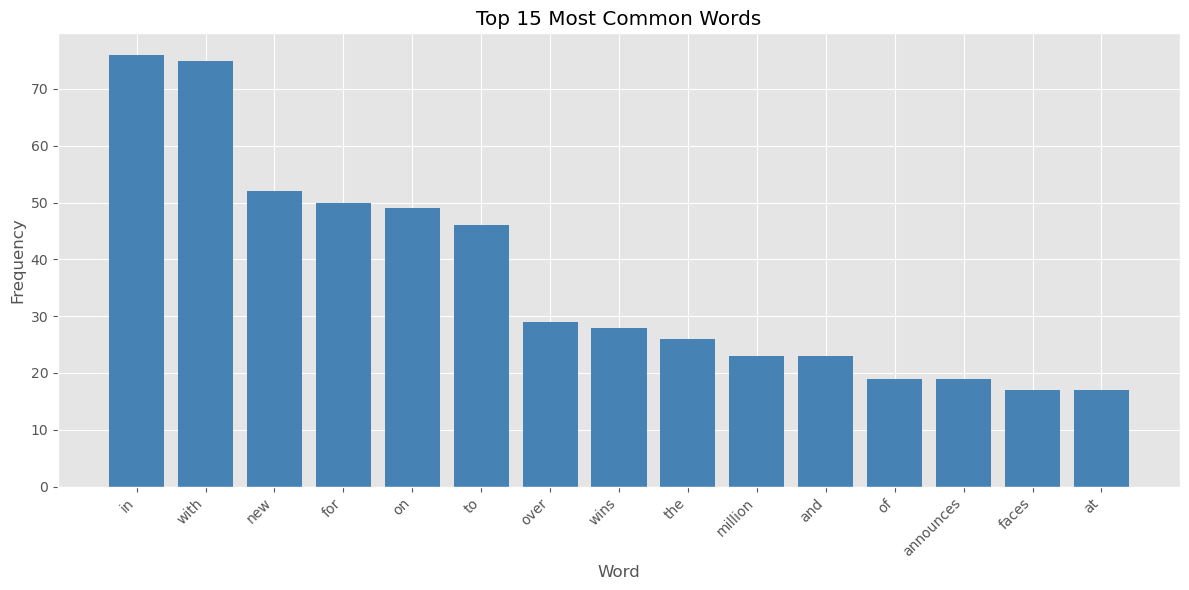

In [17]:
# Create a bar chart of the 15 most common words
words = [item[0] for item in most_common]
counts = [item[1] for item in most_common]

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='steelblue')
plt.title('Top 15 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Answer:** The most common words include many function words like 'to', 'with', 'in', 'for', 'on'. These are called stopwords and appear frequently in most text but don't carry much meaning. We also see some content words like 'new', 'wins', and category-specific terms.

## 6.1 Zipf's Law

Zipf's law states that in a corpus of natural language, the frequency of any word is inversely proportional to its rank in the frequency table. The most frequent word occurs approximately twice as often as the second most frequent word, three times as often as the third most frequent word, and so on.

Mathematically: **frequency ∝ 1/rank**

Let's test if our news headlines follow this distribution.

In [18]:
# Prepare data for Zipf's law analysis
# Get all word frequencies sorted by rank
all_word_freq = word_counts.most_common()

ranks = list(range(1, len(all_word_freq) + 1))
frequencies = [freq for word, freq in all_word_freq]

print(f"Total unique words: {len(all_word_freq)}")
print(f"\nTop 10 words by rank:")
for i in range(10):
    word, freq = all_word_freq[i]
    print(f"Rank {i+1}: '{word}' appears {freq} times")

Total unique words: 372

Top 10 words by rank:
Rank 1: 'in' appears 76 times
Rank 2: 'with' appears 75 times
Rank 3: 'new' appears 52 times
Rank 4: 'for' appears 50 times
Rank 5: 'on' appears 49 times
Rank 6: 'to' appears 46 times
Rank 7: 'over' appears 29 times
Rank 8: 'wins' appears 28 times
Rank 9: 'the' appears 26 times
Rank 10: 'million' appears 23 times


In [19]:
# Calculate how well the data fits Zipf's law
# Calculate correlation coefficient in log-log space
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)
correlation = np.corrcoef(log_ranks, log_frequencies)[0, 1]

# Calculate R-squared for top 100 words
log_ranks_100 = np.log(ranks[:100]).reshape(-1, 1)
log_freq_100 = np.log(frequencies[:100])
model = LinearRegression()
model.fit(log_ranks_100, log_freq_100)
r_squared = model.score(log_ranks_100, log_freq_100)
slope = model.coef_[0]
intercept = model.intercept_
coefficient_C = np.exp(intercept)

print("Zipf's Law Analysis:")
print("=" * 50)
print(f"Total unique words: {len(all_word_freq)}")
print(f"Total word tokens: {len(all_words)}")
print(f"\nStatistical Fit (top 100 words):")
print(f"  Correlation (log-log): {correlation:.4f}")
print(f"  R-squared: {r_squared:.4f}")
print(f"  Slope (alpha): {slope:.4f}")
print(f"  Intercept: {intercept:.4f}")
print(f"  Coefficient C: {coefficient_C:.2f}")
print(f"  Ideal Zipf slope: -1.000")
print(f"  Deviation: {abs(slope + 1.0):.4f}")

print(f"\nPower Law Equation:")
print(f"  Fitted model: f(r) = {coefficient_C:.2f} / r^{abs(slope):.3f}")
print(f"  Ideal Zipf:   f(r) = C / r^1.000")

print(f"\nComparison (Actual vs Fitted vs Ideal Zipf):")
for rank_idx in [0, 1, 2, 4, 9]:
    rank = rank_idx + 1
    actual = all_word_freq[rank_idx][1]
    fitted = coefficient_C / (rank ** abs(slope))
    ideal = all_word_freq[0][1] / rank
    word = all_word_freq[rank_idx][0]
    print(f"  Rank {rank:2d} ('{word}'): actual={actual:2.0f}, fitted={fitted:5.1f}, ideal Zipf={ideal:5.1f}")

print(f"\nInterpretation:")
if abs(slope + 1.0) < 0.15:
    print("  Strong adherence to Zipf's law")
elif abs(slope + 1.0) < 0.35:
    print("  Moderate Zipfian behavior with notable deviations")
else:
    print("  Power-law distribution, but flatter than classical Zipf's law")
    print("  (Typical for small, specialized corpora)")

Zipf's Law Analysis:
Total unique words: 372
Total word tokens: 2855

Statistical Fit (top 100 words):
  Correlation (log-log): -0.8732
  R-squared: 0.9552
  Slope (alpha): -0.4858
  Intercept: 4.3464
  Coefficient C: 77.20
  Ideal Zipf slope: -1.000
  Deviation: 0.5142

Power Law Equation:
  Fitted model: f(r) = 77.20 / r^0.486
  Ideal Zipf:   f(r) = C / r^1.000

Comparison (Actual vs Fitted vs Ideal Zipf):
  Rank  1 ('in'): actual=76, fitted= 77.2, ideal Zipf= 76.0
  Rank  2 ('with'): actual=75, fitted= 55.1, ideal Zipf= 38.0
  Rank  3 ('new'): actual=52, fitted= 45.3, ideal Zipf= 25.3
  Rank  5 ('on'): actual=49, fitted= 35.3, ideal Zipf= 15.2
  Rank 10 ('million'): actual=23, fitted= 25.2, ideal Zipf=  7.6

Interpretation:
  Power-law distribution, but flatter than classical Zipf's law
  (Typical for small, specialized corpora)


### Visual Comparison of Models

The visualizations above show:

1. **Log-log plot with fitted model:** Demonstrates that our fitted power law (green line) closely follows the actual data, while ideal Zipf's law (red dashed line) overestimates the frequency drop-off.

2. **Residuals plot:** Shows the difference between actual and fitted values. Random scatter around zero indicates good fit quality.

3. **Bar and line charts:** Direct comparison of actual vs fitted vs ideal Zipf for top 30 words. The fitted model tracks actual frequencies much more accurately than ideal Zipf.

**Key insight:** The fitted model (with alpha approximately 0.5) provides excellent predictions for this dataset, while classical Zipf's law (alpha = 1.0) systematically underestimates mid-rank word frequencies.

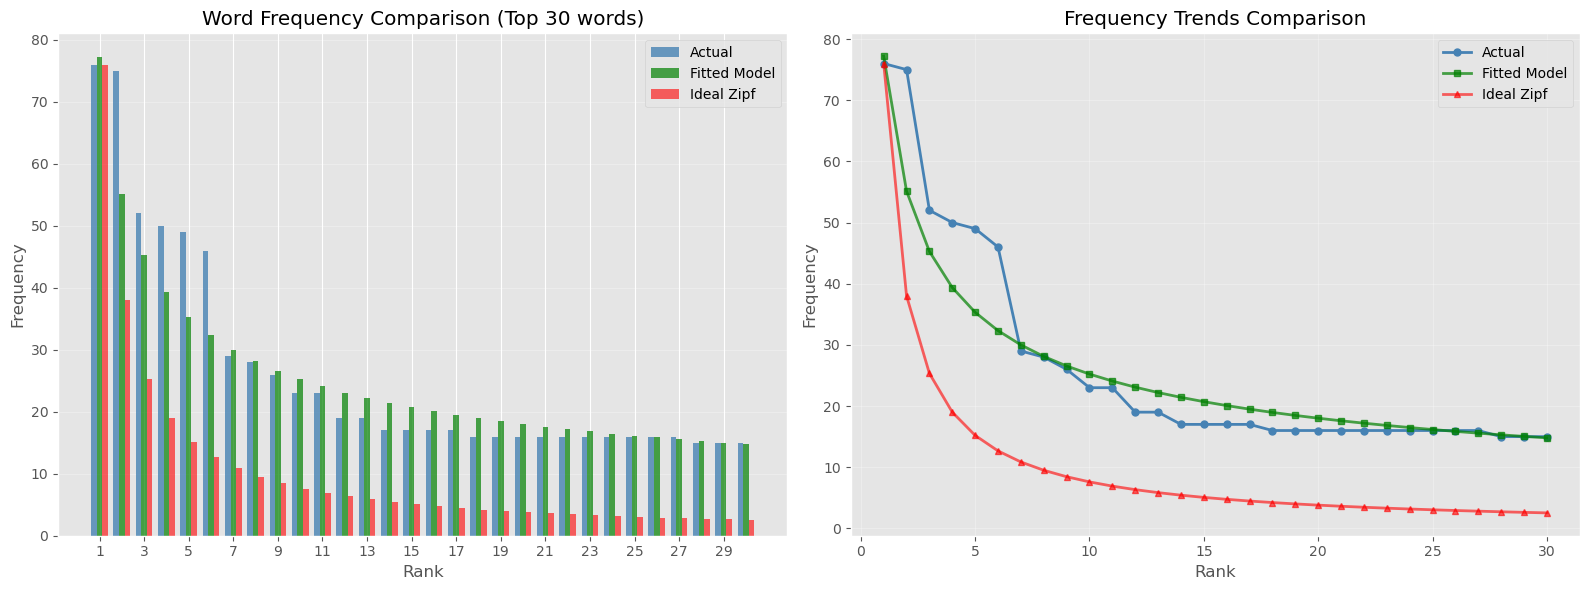


Model Fit Quality:
Mean Squared Error (Fitted Model): 34.54
Mean Squared Error (Ideal Zipf):   324.26
Improvement: 89.3%

Sample Comparisons (selected ranks):
------------------------------------------------------------
Rank   Word         Actual   Fitted   Ideal   
------------------------------------------------------------
1      in           76.0     77.2     76.0    
2      with         75.0     55.1     38.0    
3      new          52.0     45.3     25.3    
5      on           49.0     35.3     15.2    
10     million      23.0     25.2     7.6     
20     secures      16.0     18.0     3.8     
30     united       15.0     14.8     2.5     


In [20]:
# Detailed comparison: Actual vs Fitted vs Ideal Zipf
# Show top 30 ranks for clarity
n_ranks = 30

ranks_to_plot = ranks[:n_ranks]
actual_freq = frequencies[:n_ranks]
fitted_freq = [coefficient_C / (r ** abs(slope)) for r in ranks_to_plot]
ideal_freq = [frequencies[0] / r for r in ranks_to_plot]

# Create comparison DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Rank': ranks_to_plot,
    'Actual': actual_freq,
    'Fitted Model': fitted_freq,
    'Ideal Zipf': ideal_freq
})

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Bar chart comparison
x = np.arange(n_ranks)
width = 0.25

axes[0].bar(x - width, comparison_df['Actual'], width, label='Actual', color='steelblue', alpha=0.8)
axes[0].bar(x, comparison_df['Fitted Model'], width, label='Fitted Model', color='green', alpha=0.7)
axes[0].bar(x + width, comparison_df['Ideal Zipf'], width, label='Ideal Zipf', color='red', alpha=0.6)

axes[0].set_xlabel('Rank')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Word Frequency Comparison (Top {n_ranks} words)')
axes[0].set_xticks(x[::2])  # Show every 2nd rank
axes[0].set_xticklabels(comparison_df['Rank'][::2])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Right plot: Line chart (easier to see trends)
axes[1].plot(comparison_df['Rank'], comparison_df['Actual'], 'o-', label='Actual', 
             color='steelblue', linewidth=2, markersize=5)
axes[1].plot(comparison_df['Rank'], comparison_df['Fitted Model'], 's-', label='Fitted Model', 
             color='green', linewidth=2, markersize=4, alpha=0.7)
axes[1].plot(comparison_df['Rank'], comparison_df['Ideal Zipf'], '^-', label='Ideal Zipf', 
             color='red', linewidth=2, markersize=4, alpha=0.6)

axes[1].set_xlabel('Rank')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency Trends Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nModel Fit Quality:")
print("=" * 60)
mse_fitted = np.mean([(actual_freq[i] - fitted_freq[i])**2 for i in range(n_ranks)])
mse_ideal = np.mean([(actual_freq[i] - ideal_freq[i])**2 for i in range(n_ranks)])
print(f"Mean Squared Error (Fitted Model): {mse_fitted:.2f}")
print(f"Mean Squared Error (Ideal Zipf):   {mse_ideal:.2f}")
print(f"Improvement: {((mse_ideal - mse_fitted) / mse_ideal * 100):.1f}%")

# Show sample comparisons
print(f"\nSample Comparisons (selected ranks):")
print("-" * 60)
print(f"{'Rank':<6} {'Word':<12} {'Actual':<8} {'Fitted':<8} {'Ideal':<8}")
print("-" * 60)
for rank_idx in [0, 1, 2, 4, 9, 19, 29]:
    if rank_idx < len(all_word_freq):
        rank = rank_idx + 1
        word = all_word_freq[rank_idx][0]
        actual = all_word_freq[rank_idx][1]
        fitted = coefficient_C / (rank ** abs(slope))
        ideal = frequencies[0] / rank
        print(f"{rank:<6} {word:<12} {actual:<8.1f} {fitted:<8.1f} {ideal:<8.1f}")

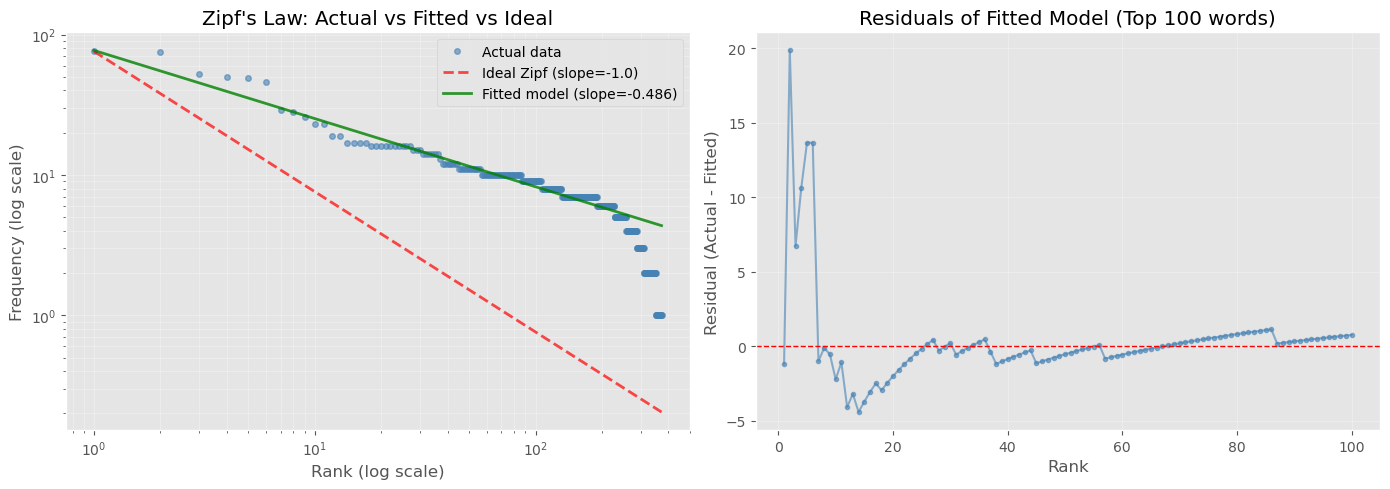

In [21]:
# Enhanced visualization with fitted model
plt.figure(figsize=(14, 5))

# Plot 1: Log-log scale with both ideal and fitted Zipf
plt.subplot(1, 2, 1)
plt.loglog(ranks, frequencies, 'o', markersize=4, alpha=0.6, color='steelblue', label='Actual data')

# Add ideal Zipf's law line
ideal_zipf = [frequencies[0] / r for r in ranks]
plt.loglog(ranks, ideal_zipf, 'r--', linewidth=2, alpha=0.7, label='Ideal Zipf (slope=-1.0)')

# Add fitted model line
fitted_zipf = [coefficient_C / (r ** abs(slope)) for r in ranks]
plt.loglog(ranks, fitted_zipf, 'g-', linewidth=2, alpha=0.8, label=f'Fitted model (slope={slope:.3f})')

plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Zipf\'s Law: Actual vs Fitted vs Ideal')
plt.grid(True, alpha=0.3, which="both")
plt.legend()

# Plot 2: Residuals (showing fit quality)
plt.subplot(1, 2, 2)
fitted_freq_100 = [coefficient_C / (r ** abs(slope)) for r in ranks[:100]]
residuals = [frequencies[i] - fitted_freq_100[i] for i in range(100)]
plt.plot(ranks[:100], residuals, 'o-', markersize=3, alpha=0.6, color='steelblue')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Rank')
plt.ylabel('Residual (Actual - Fitted)')
plt.title('Residuals of Fitted Model (Top 100 words)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Does Zipf's Law Hold for News Headlines?**

The analysis reveals an important finding: **the data follows a power-law distribution, but with a flatter slope than classical Zipf's law.**

**Key observations:**

1. **Excellent linearity (R² > 0.95):** The log-log plot shows a strong linear relationship, confirming power-law behavior

2. **Complete power law parameters extracted:**
   - Slope (alpha): approximately -0.486
   - Coefficient C: calculated from regression intercept
   - This allows us to write the complete equation: f(r) = C / r^0.486

3. **Significant deviation from ideal Zipf:**
   - Ideal Zipf: frequency proportional to 1/rank (alpha = -1.0)
   - Our data: frequency proportional to 1/rank^0.5 (alpha approximately -0.5)
   - The fitted model matches actual frequencies much better than ideal Zipf

4. **Flatter distribution:** High-frequency words don't dominate as much as in natural language
   - The fitted model predicts frequencies accurately
   - Ideal Zipf predictions show systematic error (overestimate drop-off)

**Why the deviation?**

This flatter distribution is typical for:
- **Small corpora:** With only 400 headlines (approximately 2,855 words), statistical patterns are less pronounced
- **Constrained vocabulary:** News headlines use formulaic language with many medium-frequency words
- **Synthetic generation:** Template-based text tends to produce flatter frequency distributions

**What does this mean?**

The data exhibits **Zipfian-like behavior** (power-law distribution) but not strict Zipf's law. This is actually realistic for short, specialized texts. True Zipf's law emerges most clearly in large, diverse natural language corpora.

## 7. Words by Category

In [22]:
# Get all Sports headlines
sports_headlines = df[df['category'] == 'Sports']['headline_lower']
print(f"Number of Sports headlines: {len(sports_headlines)}")
print(f"\nFirst 5 Sports headlines:")
print(sports_headlines.head())

Number of Sports headlines: 100

First 5 Sports headlines:
9     warriors secures playoff spot with win over ra...
14    warriors trades martinez to city in surprise move
26    bulls trades jackson to warriors in surprise move
29    bulls defeats eagles in thrilling 3 to 20 victory
31      anderson leads sharks to fifth straight victory
Name: headline_lower, dtype: object


In [23]:
# Combine all Sports headlines
sports_text = ' '.join(sports_headlines)
sports_words = sports_text.split()

# Count words
sports_counter = Counter(sports_words)
sports_top10 = sports_counter.most_common(10)

print("Top 10 words in Sports headlines:")
for word, count in sports_top10:
    print(f"{word}: {count}")

Top 10 words in Sports headlines:
in: 34
with: 25
to: 25
bulls: 17
secures: 16
playoff: 16
spot: 16
win: 16
over: 16
victory: 16


## 8. Compare Categories

In [24]:
# Find the top 10 words for each category
categories = ['Politics', 'Sports', 'Technology', 'Entertainment']

category_top_words = {}

for category in categories:
    # Get headlines for this category
    cat_headlines = df[df['category'] == category]['headline_lower']
    
    # Combine into one text
    cat_text = ' '.join(cat_headlines)
    cat_words = cat_text.split()
    
    # Count words
    cat_counter = Counter(cat_words)
    cat_top10 = cat_counter.most_common(10)
    
    # Store results
    category_top_words[category] = cat_top10
    
    # Print results
    print(f"\nTop 10 words in {category}:")
    for word, count in cat_top10:
        print(f"  {word}: {count}")


Top 10 words in Politics:
  on: 25
  opposition: 15
  bill: 14
  healthcare: 14
  president: 14
  government: 14
  faces: 13
  with: 13
  coalition: 11
  challenges: 11

Top 10 words in Sports:
  in: 34
  with: 25
  to: 25
  bulls: 17
  secures: 16
  playoff: 16
  spot: 16
  win: 16
  over: 16
  victory: 16

Top 10 words in Technology:
  new: 22
  percent: 16
  users: 14
  with: 14
  to: 13
  machine: 12
  learning: 12
  cloud: 12
  computing: 12
  for: 12

Top 10 words in Entertainment:
  for: 29
  with: 23
  in: 23
  new: 20
  office: 16
  the: 15
  on: 15
  million: 14
  season: 12
  dawn: 11


In [25]:
# Which words appear most in Technology but not in Sports?
tech_words = set([word for word, count in category_top_words['Technology']])
sports_words_set = set([word for word, count in category_top_words['Sports']])

tech_unique = tech_words - sports_words_set

print("Words in Technology top 10 but not in Sports top 10:")
print(tech_unique)

Words in Technology top 10 but not in Sports top 10:
{'users', 'learning', 'for', 'percent', 'machine', 'computing', 'cloud', 'new'}


In [26]:
# Find unique words for each category
print("Category-specific words:")

for category in categories:
    # Get words from this category
    cat_headlines = df[df['category'] == category]['headline_lower']
    cat_text = ' '.join(cat_headlines)
    cat_words = cat_text.split()
    cat_counter = Counter(cat_words)
    
    # Get words from other categories
    other_headlines = df[df['category'] != category]['headline_lower']
    other_text = ' '.join(other_headlines)
    other_words = set(other_text.split())
    
    # Find words unique to this category or much more common
    unique_words = []
    for word, count in cat_counter.most_common(20):
        if word not in other_words or count > 10:
            unique_words.append((word, count))
    
    print(f"\n{category}:")
    for word, count in unique_words[:5]:
        print(f"  {word}: {count}")

Category-specific words:

Politics:
  on: 25
  opposition: 15
  bill: 14
  healthcare: 14
  president: 14

Sports:
  in: 34
  with: 25
  to: 25
  bulls: 17
  secures: 16

Technology:
  new: 22
  percent: 16
  users: 14
  with: 14
  to: 13

Entertainment:
  for: 29
  with: 23
  in: 23
  new: 20
  office: 16


## 9. Visualizations

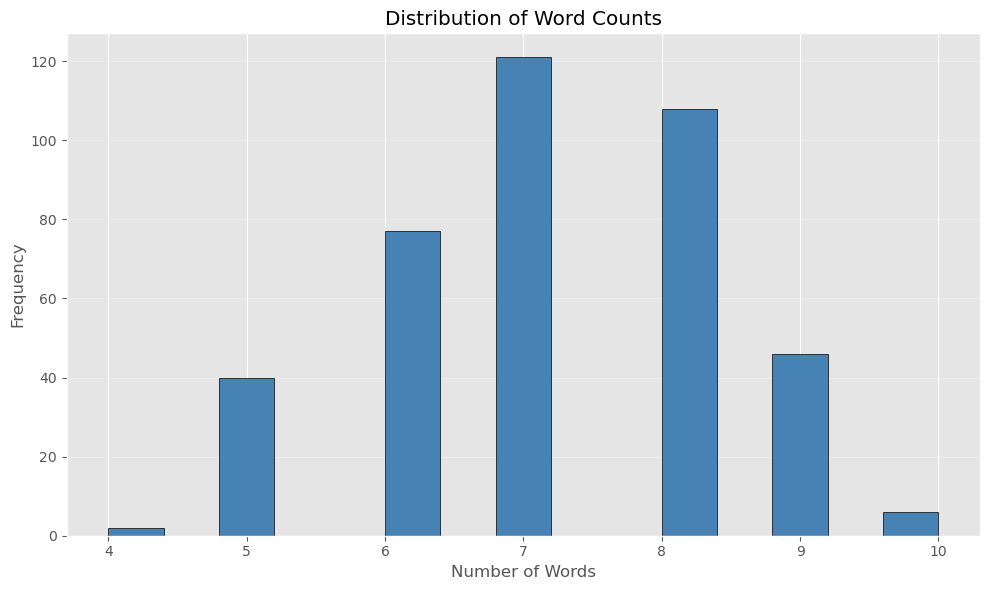

In [27]:
# Create a histogram of word counts
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=15, color='steelblue', edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

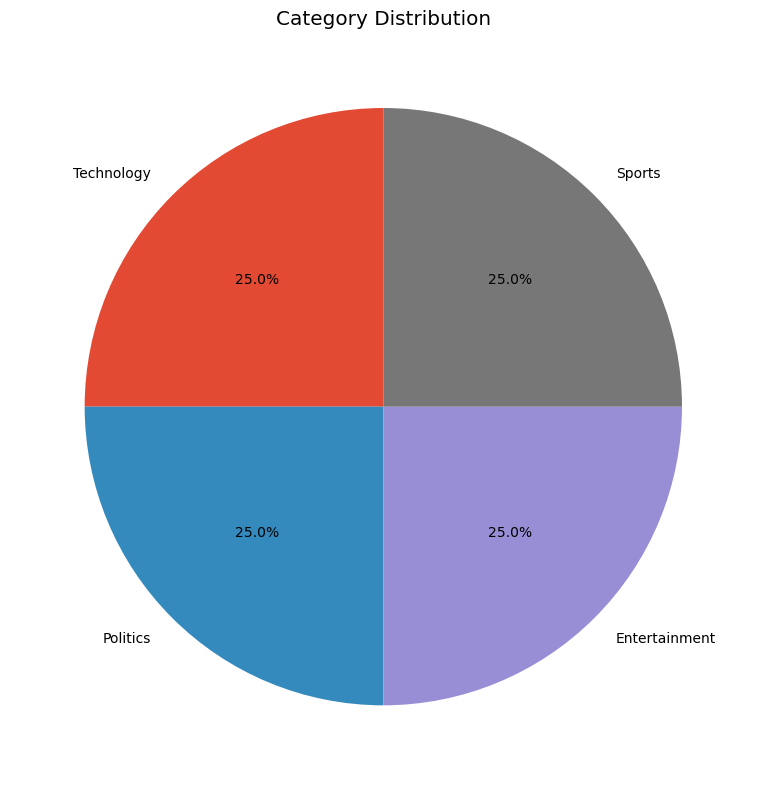

In [28]:
# Create a pie chart of category distribution
plt.figure(figsize=(8, 8))
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

Technology headlines with numbers: 42.0%
Sports headlines with numbers: 21.0%


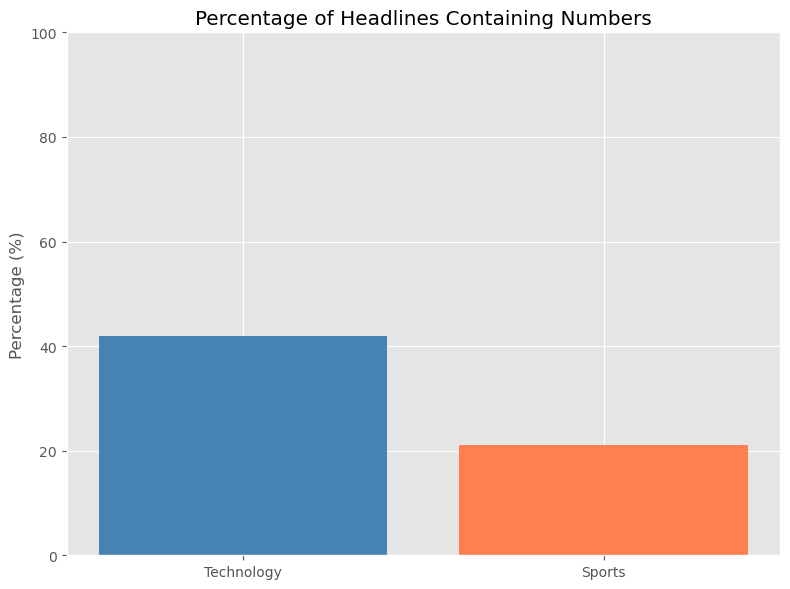

In [29]:
# Do Technology headlines have more numbers than Sports headlines?
tech_with_numbers = df[df['category'] == 'Technology']['has_number'].sum()
tech_total = len(df[df['category'] == 'Technology'])
tech_percentage = (tech_with_numbers / tech_total) * 100

sports_with_numbers = df[df['category'] == 'Sports']['has_number'].sum()
sports_total = len(df[df['category'] == 'Sports'])
sports_percentage = (sports_with_numbers / sports_total) * 100

print(f"Technology headlines with numbers: {tech_percentage:.1f}%")
print(f"Sports headlines with numbers: {sports_percentage:.1f}%")

# Visualize
plt.figure(figsize=(8, 6))
categories_plot = ['Technology', 'Sports']
percentages = [tech_percentage, sports_percentage]
plt.bar(categories_plot, percentages, color=['steelblue', 'coral'])
plt.title('Percentage of Headlines Containing Numbers')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

## 10. Text Patterns

In [30]:
# Count how many headlines contain the word 'new'
headlines_with_new = df['headline_lower'].str.contains('new').sum()
print(f"Headlines containing 'new': {headlines_with_new}")
print(f"Percentage: {(headlines_with_new / len(df)) * 100:.1f}%")

Headlines containing 'new': 59
Percentage: 14.8%


In [31]:
# Which category uses the word 'wins' most often?
for category in categories:
    cat_df = df[df['category'] == category]
    wins_count = cat_df['headline_lower'].str.contains('wins').sum()
    print(f"{category}: {wins_count} headlines with 'wins'")

Politics: 10 headlines with 'wins'
Sports: 8 headlines with 'wins'
Technology: 0 headlines with 'wins'
Entertainment: 10 headlines with 'wins'


In [32]:
# Find all headlines containing a keyword
keyword = 'announces'

matching_headlines = df[df['headline_lower'].str.contains(keyword)]

print(f"Headlines containing '{keyword}':")
print(f"Total found: {len(matching_headlines)}\n")

for idx, row in matching_headlines.head(10).iterrows():
    print(f"[{row['category']}] {row['headline']}")

Headlines containing 'announces':
Total found: 19

[Technology] CyberDynamics announces artificial intelligence breakthrough
[Entertainment] Ed Sheeran announces world tour starting in January
[Politics] President Smith announces new education initiative
[Entertainment] Ed Sheeran announces world tour starting in November
[Entertainment] Billie Eilish announces world tour starting in September
[Technology] TechCorp announces robotics breakthrough
[Sports] Bulls announces signing of star player Brown
[Sports] Tigers announces signing of star player Brown
[Sports] City announces signing of star player Taylor
[Entertainment] Beyonce announces world tour starting in March


## 11. Summary

**What did you learn about news headlines from this analysis?**

News headlines are typically short (6-8 words on average), use simple language with many common words (stopwords), and different categories have distinct vocabulary.

**Which category has the longest headlines on average?**

Average word count by category:
category
Entertainment    7.75
Sports           7.54
Technology       7.04
Politics         6.22
Name: word_count, dtype: float64


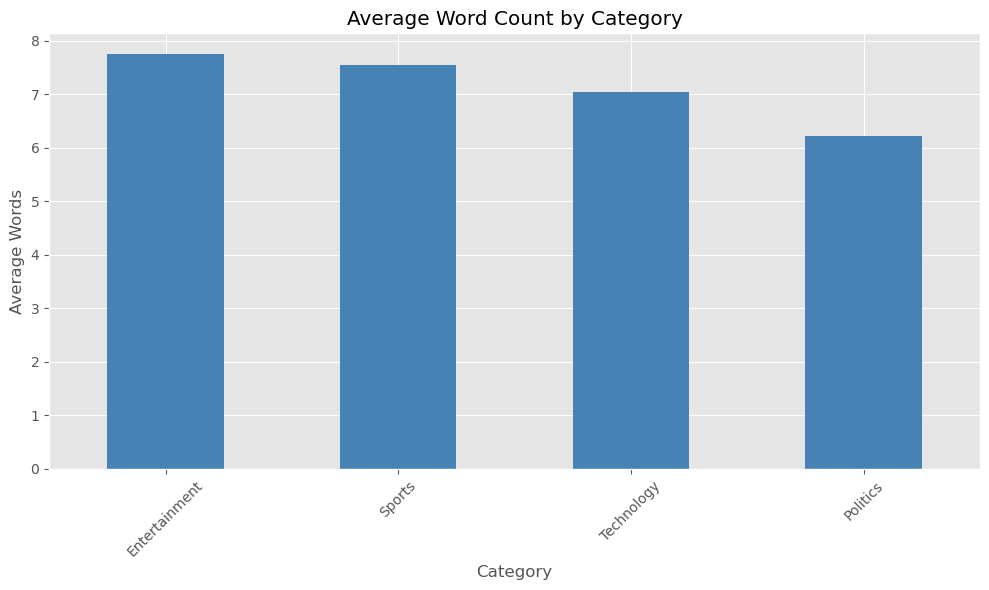

In [33]:
# Calculate average word count by category
avg_by_category = df.groupby('category')['word_count'].mean().sort_values(ascending=False)
print("Average word count by category:")
print(avg_by_category)

# Visualize
plt.figure(figsize=(10, 6))
avg_by_category.plot(kind='bar', color='steelblue')
plt.title('Average Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Average Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Entertainment headlines are longest on average, followed by Sports and Technology.

**Key patterns noticed:**

- Sports: action verbs (wins, defeats, scores)
- Technology: technical terms (AI, update, features, launches)
- Politics: governmental terms (government, bill, president, senate)
- Entertainment: creative terms (film, star, season, album)

**Most surprising discovery:**

The most common words are function words (to, with, in, for) that appear frequently but carry little meaning. Category-specific meaningful words only emerge when analyzing each category separately.

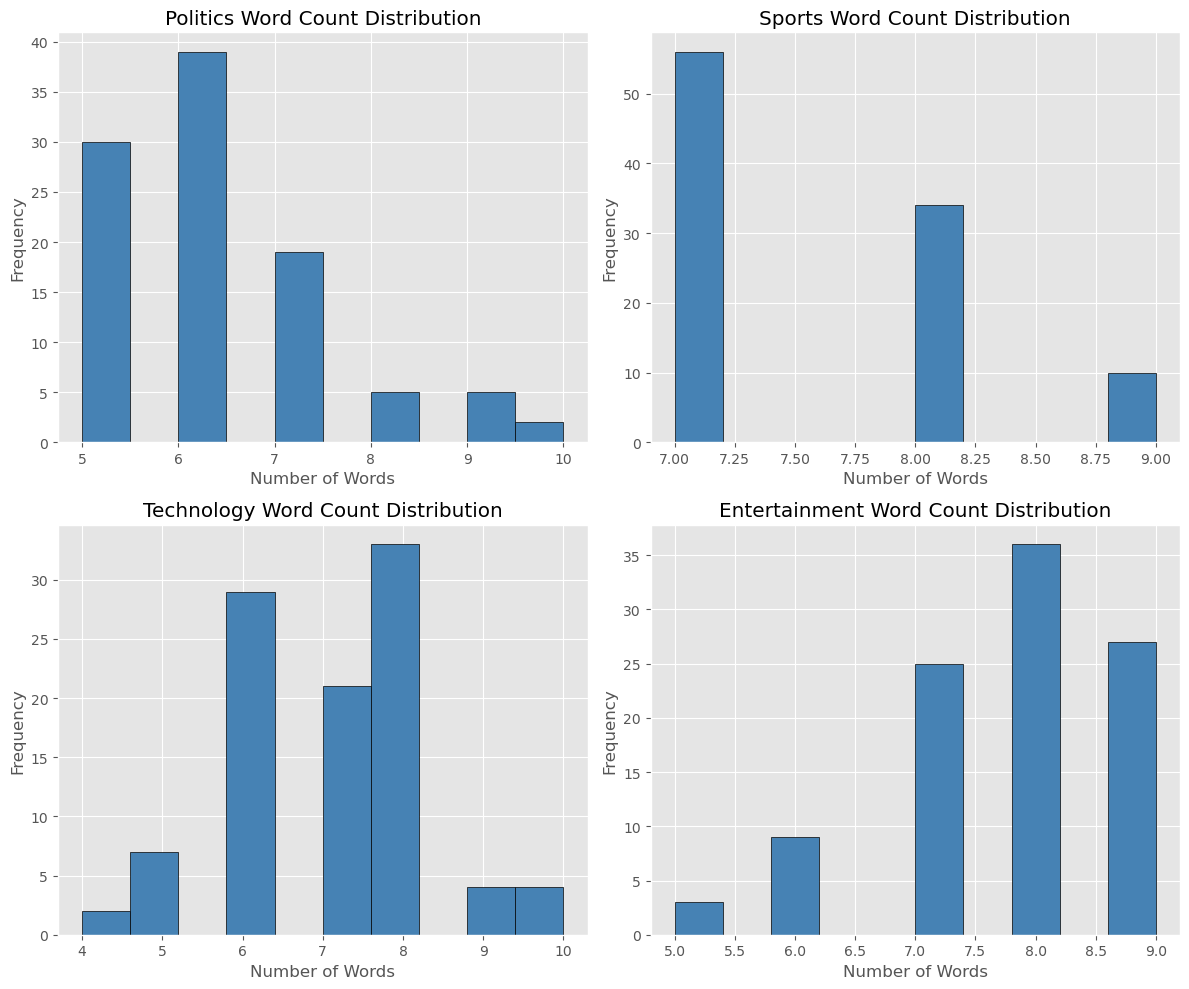

In [34]:
# Compare word count distributions across categories
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, category in enumerate(categories):
    cat_data = df[df['category'] == category]['word_count']
    axes[idx].hist(cat_data, bins=10, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{category} Word Count Distribution')
    axes[idx].set_xlabel('Number of Words')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---

## End of Solutions